# Bengaluru House Price Prediction

## Introduction
This project is about predicting the house prices in Bengaluru, India based on the location, total area, number of rooms and baths and some other features provided in the dataset.

## About the data
The [Bengaluru house price data](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data) is made available by [AmitabhaChakraborty](https://www.kaggle.com/amitabhajoy). The data set contains 9 columns which are area_type, availability, location, size, society, total_sqft, bath, balcony and price.

## Contents
 - Exploring the data
 - Data Cleaning
 - Data manipulation
 - Feature Engineering
 - Implementing models and Hyperparameter tuning
 - Making predictions



First we will import the libraries such as pandas, numpy, matplotlib and seaborn and then we will read the data and store it in a dataframe to have a look at the rows and columns.

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv('./Dataset/Bengaluru_House_Data.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


we will use the shape and describe function to get a summary of the data

In [165]:
df.shape

(13320, 9)

In [166]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Now, let's look at the null values in each column

In [167]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

we will use the groupby function to look at the the count of houses based on the area type, we can also plot a graph to visualise the data

In [168]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Text(0.5, 1.0, 'Average price based on area type')

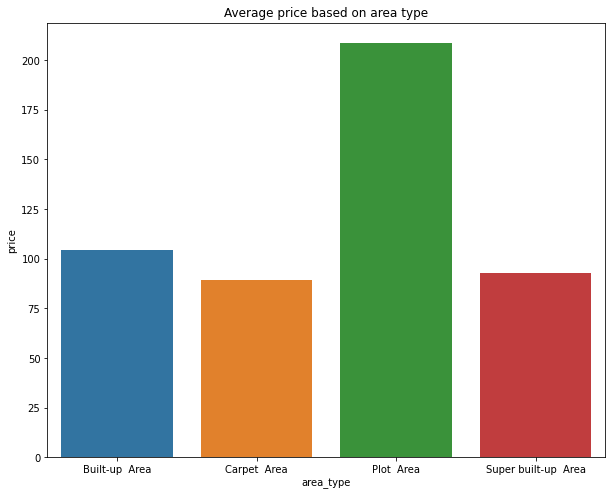

In [169]:
avg_price_by_area_type = df.groupby('area_type')['price'].agg('mean')

plt.figure(figsize=(10,8))
sns.barplot(x=avg_price_by_area_type.index, y=avg_price_by_area_type)
plt.title('Average price based on area type')

Let's plot a scatter chart to view the relation between the price and availability columns

<AxesSubplot:xlabel='availability', ylabel='price'>

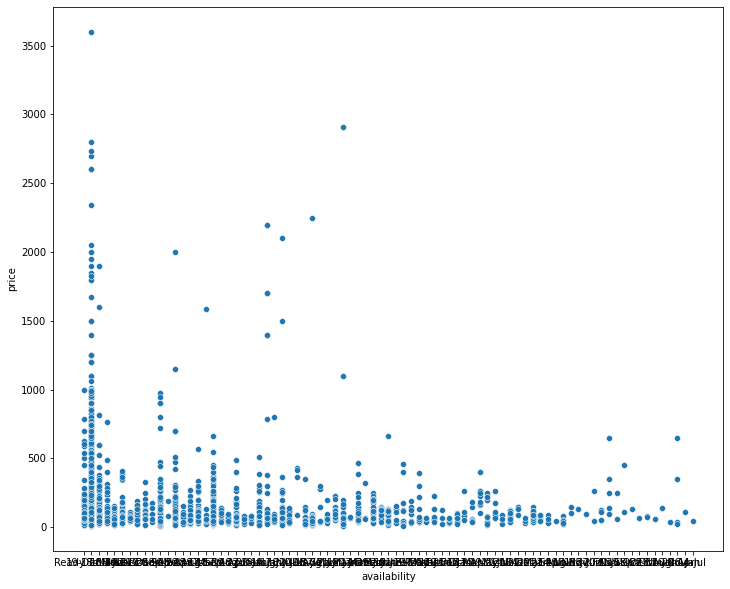

In [170]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='availability', y='price', data=df)

There doesn't seem to be a strong relationship between those two columns so we will just drop the availability column

In [171]:
df_v2 = df.drop(['availability'], axis=1)

In [172]:
df_v2['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [173]:
df_v2[df_v2['location'].isnull()]

,area_type,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


Dropping the row having null value for the location column 

In [174]:
df_v2 = df_v2.drop(568, axis=0)

In [175]:
df_v2.isnull().sum()

area_type        0
location         0
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

Let's plot a bar chart for average price based on location, we will plot the first 50 location having the highest price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Cubbon Road'),
  Text(1, 0, 'Ashok Nagar'),
  Text(2, 0, 'Defence Colony'),
  Text(3, 0, 'Yemlur'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'D Souza Layout'),
  Text(6, 0, 'Sadashiva Nagar'),
  Text(7, 0, 'Sindhi Colony'),
  Text(8, 0, 'Srinivas Colony'),
  Text(9, 0, '5th Block Jayanagar'),
  Text(10, 0, 'Binnamangala'),
  Text(11, 0, 'Cunningham Road'),
  Text(12, 0, 'Hunasamaranahalli'),
  Text(13, 0, '2nd Block Koramangala'),
  Text(14, 0, 'Shanthala Nagar'),
  Text(15, 0, 'Dollars Colony'),
  Text(16, 0, 'Kathreguppe'),
  Text(17, 0, 'Sector 4 HSR Layout'),
  Text(18, 0, 'Rest House Road'),
  Text(19, 0, 'Ramakrishnappa Layout'),
  Text(20, 0, '6th block banashankari 3rd stage, 100 feet ORR'),
  Text(21, 0, '1A Block Koramangala'),
  Text(22

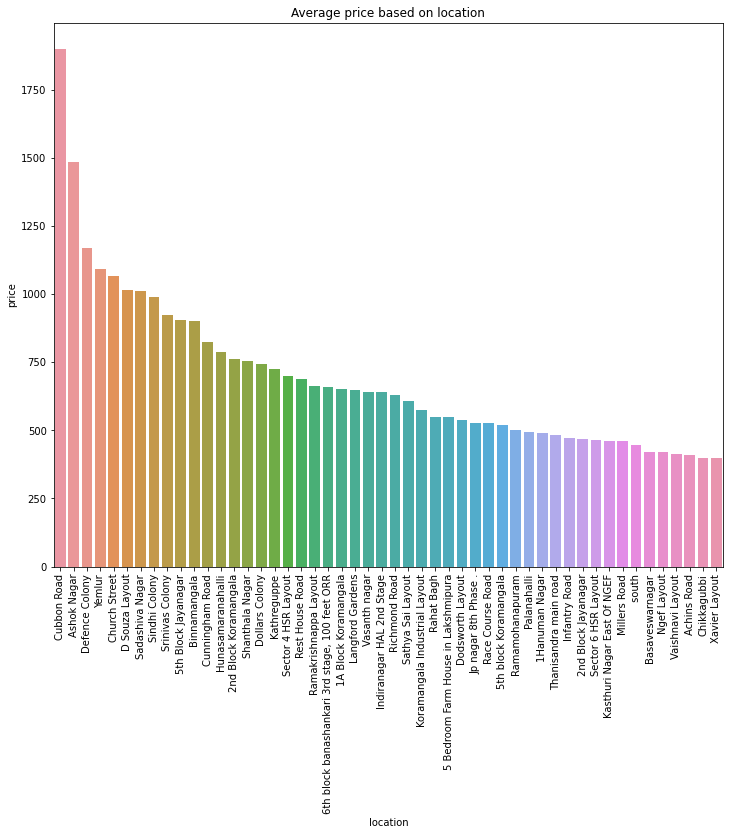

In [176]:
avg_price_by_area_type = df_v2.groupby('location')['price'].agg('mean').sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=avg_price_by_area_type.index[:50], y=avg_price_by_area_type[:50])
plt.title('Average price based on location')
plt.xticks(rotation=90)


In [177]:
df_v2['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

Now we will filter out the all the rows from the dataframe whose size column is not null, this will give us a new dataframe having 0 null values for the size column.

In [178]:
df_v2[df_v2['size'].isnull()]

,area_type,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [179]:
# df_v3 = df_v2.copy()
df_v3 = df_v2[df_v2['size'].notna()]

In [180]:
df_v3.isnull().sum()

area_type        0
location         0
size             0
society       5499
total_sqft       0
bath            57
balcony        593
price            0
dtype: int64

We will create a new column bhk and store only the numeric value from the size column and will later drop the sie column.

In [181]:
df_v3['bhk'] = df_v3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ugosw\AppData\Local\Temp\ipykernel_7496\3831265650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v3['bhk'] = df_v3['size'].apply(lambda x: int(x.split(' ')[0]))


In [182]:
df_v3.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [183]:
df_v3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

We can observe that some of the values in bhk columns have values more than 15, let's see the total sqft of those houses if that makes any sense otherwise we will drop those columns.

In [184]:
df_v3[df_v3['bhk']>15]

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,NaN,8000,27.0,0.0,230.0,27
3379,Super built-up Area,1Hanuman Nagar,19 BHK,NaN,2000,16.0,NaN,490.0,19
3609,Super built-up Area,Koramangala Industrial Layout,16 BHK,NaN,10000,16.0,NaN,550.0,16
4684,Plot Area,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0,43
11559,Plot Area,1Kasavanhalli,18 Bedroom,HMwerCo,1200,18.0,NaN,200.0,18


In [185]:
df_v4 = df_v3.drop(index=[1718,4684,3379,11559])
df_v4.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [186]:
df_v4.isnull().sum()

area_type        0
location         0
size             0
society       5496
total_sqft       0
bath            57
balcony        591
price            0
bhk              0
dtype: int64

Since there are lot of null values on the society column, we will drop that column as we do not have much information on that.

In [187]:
df_v4 = df_v4.drop(['society'], axis=1)

In [188]:
df_v4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [189]:
df_v4.dtypes

area_type      object
location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
bhk             int64
dtype: object

Now in the total_sqft column we can obeserve that there are some values that are listed as range (1133-1384) and some values are in different unit and the unit is also mentioned in the column, so we will perform two operation here:

First, we will list out all the column having alphabatical values, and then we will use string split method to split the numeric values and conver it into square metres.

Then we will deal with the range values, we will split the range and take the average of both values and put that value in place.

In [190]:
df_v4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [191]:
df_v4[df_v4['total_sqft'].str.contains('[a-zA-Z]')]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.50,1
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,NaN,265.00,9
775,Built-up Area,Basavanagara,1 BHK,1000Sq. Meter,2.0,1.0,93.00,1
872,Super built-up Area,Singapura Village,2 BHK,1100Sq. Yards,2.0,NaN,45.00,2
1019,Plot Area,Marathi Layout,1 Bedroom,5.31Acres,1.0,0.0,110.00,1
1086,Plot Area,Narasapura,2 Bedroom,30Acres,2.0,2.0,29.50,2
1400,Super built-up Area,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296.00,9
1712,Plot Area,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,1.0,95.00,3
1743,Super built-up Area,Hosa Road,3 BHK,142.61Sq. Meter,3.0,1.0,115.00,3
1821,Plot Area,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,1.0,76.00,3


In [192]:
df_v5 = df_v4.copy()

for row in df_v5.index:
    if 'Sq. Meter' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('S')[0])*10.764
    elif 'Sq. Yards' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('S')[0])*9.0
    elif 'Perch' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('P')[0])*272.25
    elif 'Acres' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('A')[0])*43560
    elif 'Cents' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('C')[0])*435.56
    elif 'Guntha' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('G')[0])*1089
    elif 'Grounds' in (df_v5.loc[row,'total_sqft']):
        df_v5.loc[row,'total_sqft'] = float(df_v5.loc[row,'total_sqft'].split('G')[0])*2400
        
    

In [193]:
df_v5.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [194]:
def sqft_to_float(sqft):
    try:
        if '-' in sqft:
            left,right = sqft.split('-')
            return (float(left.strip())+float(right.strip()))/2
        else:
            return float(sqft)
    except:
        return sqft

In [195]:
df_v5['total_sqft'] = df_v5['total_sqft'].apply(sqft_to_float)

In [196]:
df_v5.total_sqft.std()

17290.244255866

Now let's look for the null values in bath columns, there are around 57 values which is very less as compared to our original dataframe so we will drop those values.

For balcony column there are lot of null values and it not strongly related to the price column so we will drop the column too.

In [197]:
df_v5.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath           57
balcony       591
price           0
bhk             0
dtype: int64

In [198]:
df_v5[df_v5['bath'].isnull()]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
56,Built-up Area,Devanahalli,4 Bedroom,3210.0,NaN,NaN,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,3203.5,NaN,NaN,224.500,4
224,Super built-up Area,Devanahalli,3 BHK,1630.0,NaN,NaN,74.820,3
344,Super built-up Area,Kanakpura Road,1 BHK,525.0,NaN,NaN,21.530,1
669,Super built-up Area,JP Nagar,5 BHK,5520.0,NaN,NaN,375.000,5
702,Super built-up Area,JP Nagar,5 BHK,5600.0,NaN,NaN,548.500,5
801,Super built-up Area,JP Nagar,4 BHK,4624.5,NaN,NaN,453.000,4
941,Super built-up Area,Whitefield,4 Bedroom,4348.5,NaN,NaN,304.000,4
1264,Built-up Area,Hennur,3 Bedroom,2264.0,NaN,NaN,155.000,3
1267,Super built-up Area,Yelahanka,3 BHK,1662.0,NaN,NaN,67.980,3


In [199]:
df_v6 = df_v5[df_v5['bath'].notna()]

<AxesSubplot:xlabel='balcony', ylabel='price'>

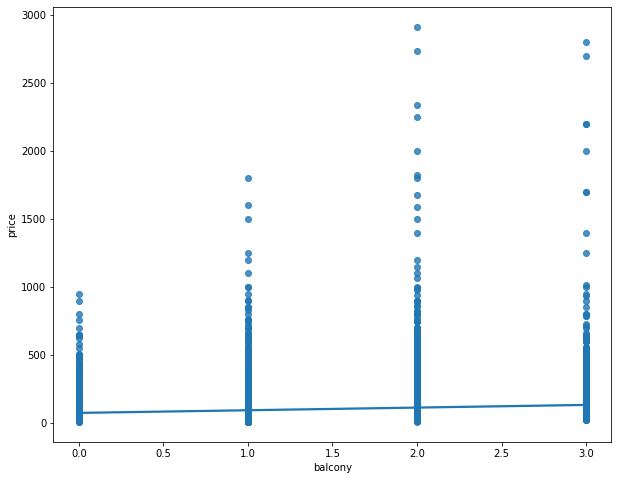

In [200]:
plt.figure(figsize=(10,8))
sns.regplot(x= df_v6['balcony'], y=df_v6['price'])

In [201]:
df_v6 = df_v6.drop('balcony', axis=1)

In [202]:
df_v6.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [203]:
df_v6.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


Now let's visualise the distribution of price to view the outliers present in the data

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


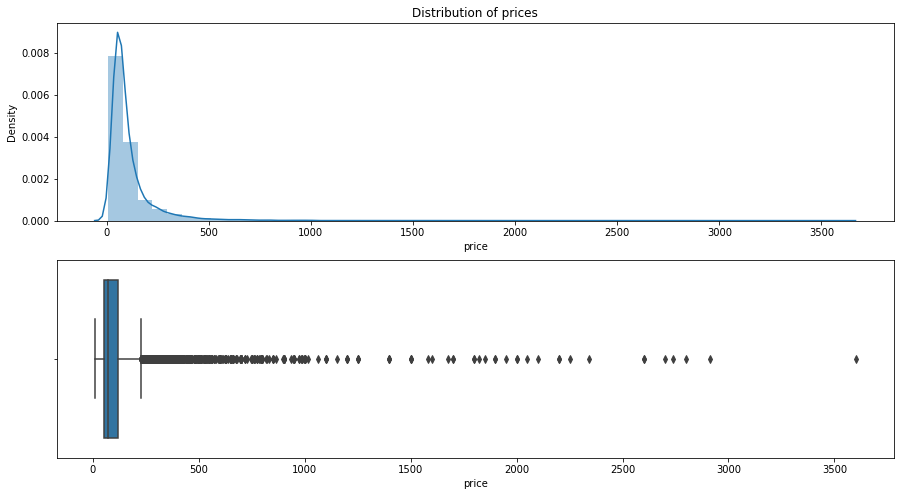

In [204]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title('Distribution of prices')
sns.distplot(df_v2['price'], kde=True)
plt.subplot(2,1,2)
sns.boxplot(df_v2['price'])
plt.show()

We will create a new column price per squeare feet to deal with outliers in our data, since the price is given in lakhs we will multiply the price by 100000.

In [205]:
df_v6['price_per_sqft'] = (df_v6['price']*100000)/df_v6['total_sqft']
df_v6.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Let's deal with the lcoation column

First we will check the unique values in the location column which is 1303, then we will apply a function if the location count is less than 10 then we will update the location value to other, this will help us in reducing the number of categorical values and hence less features.

In [206]:
len(df_v6['location'].unique())

1301

In [207]:
location_unique = df_v6['location'].value_counts().sort_values(ascending=False)

In [208]:
location_unique.tail(10)

Bapuji Nagar            1
Vijaypura               1
Manonarayanapalya       1
Anantapuram             1
arudi                   1
Hal old airport road    1
Kanakapura Road,        1
Thyagraj Nagar          1
Off Bannergatta Road    1
Abshot Layout           1
Name: location, dtype: int64

In [209]:
location_unique_less_10 = location_unique[location_unique<10]

In [210]:
df_v6['location'] = df_v6['location'].apply(lambda x: 'other' if x in location_unique_less_10 else x)
len(df_v6['location'].unique())

254

In [211]:
df_v6.head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


To remove some more outliers we will check the number of columns having sie of each bedroom more than 200 sqft, Generally the size of each bedroom should be less than 200 sqft so anything more than that we will drop the rows.

In [212]:
df_v6[df_v6['total_sqft']/df_v6['bhk']<200]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
68,Plot Area,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13073,Plot Area,Nagarbhavi,4 Bedroom,600.0,3.0,100.0,4,16666.666667
13112,Plot Area,Nagavara,3 Bedroom,440.0,3.0,35.0,3,7954.545455
13198,Plot Area,other,8 Bedroom,1200.0,8.0,140.0,8,11666.666667
13221,Plot Area,other,9 Bedroom,1178.0,9.0,75.0,9,6366.723260


In [213]:
df_v6.shape

(13242, 8)

In [214]:
df_v7 = df_v6[~(df_v6['total_sqft']/df_v6['bhk']<200)]
df_v7.shape

(12903, 8)

We can see by plotting a box plot that there are still a lot of ouliers present, so we will create a function to remove the outliers using the Inter quartile range, we will discard all the values which are not in the inter quartile range.

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

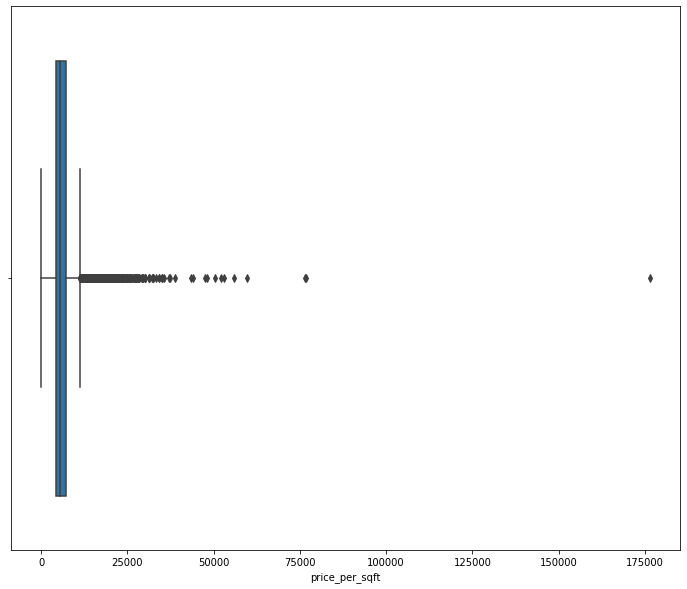

In [215]:
plt.figure(figsize=(12,10))
sns.boxplot(df_v7['price_per_sqft'])

In [216]:
df_v7['price_per_sqft'].describe()

count     12903.000000
mean       6487.555217
std        4345.709861
min           2.257423
25%        4237.288136
50%        5350.411132
75%        7094.783331
max      176470.588235
Name: price_per_sqft, dtype: float64

In [217]:
# def outlier_remove_price_per_sqft(df):
#     df_outlier = pd.DataFrame()

#     for key,subdf in df.groupby('location'):
#         mean =  np.mean(subdf.price_per_sqft)
#         std = np.std(subdf.price_per_sqft)
#         reduced_df = subdf[(subdf.price_per_sqft<mean+3*std) & (subdf.price_per_sqft>mean-3*std)]
#         df_outlier = pd.concat([df_outlier,reduced_df], ignore_index = True)
#     return df_outlier

In [218]:
def outlier_remove_price_per_sqft_iqr(df, q1=0.25, q3=0.75):
    df_outlier = pd.DataFrame()

    for key,subdf in df.groupby('location'):
        quartile1 = subdf['price_per_sqft'].quantile(q1)
        quartile3 = subdf['price_per_sqft'].quantile(q3)
        iqr = quartile3 - quartile1
        upper_limit = quartile3 + 1.5*iqr
        lower_limit = quartile1 - 1.5*iqr
        reduced_df = subdf[(subdf.price_per_sqft<upper_limit) & (subdf.price_per_sqft>lower_limit)]
        df_outlier = pd.concat([df_outlier,reduced_df], ignore_index = True)
    return df_outlier

In [219]:
df_v8 = outlier_remove_price_per_sqft_iqr(df_v7)
df_v8.shape

(11978, 8)

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

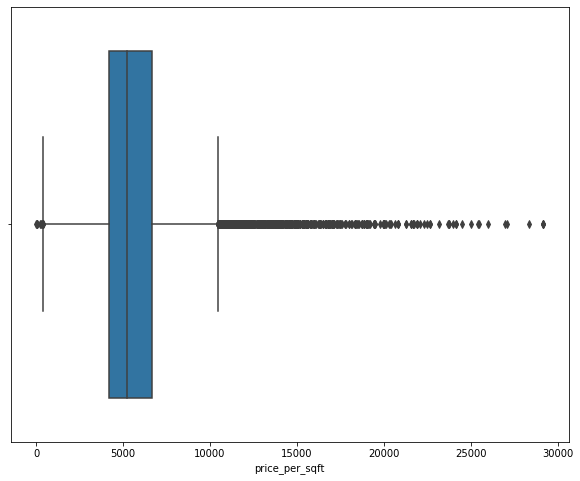

In [220]:
plt.figure(figsize=(10,8))
sns.boxplot(df_v8['price_per_sqft'])

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

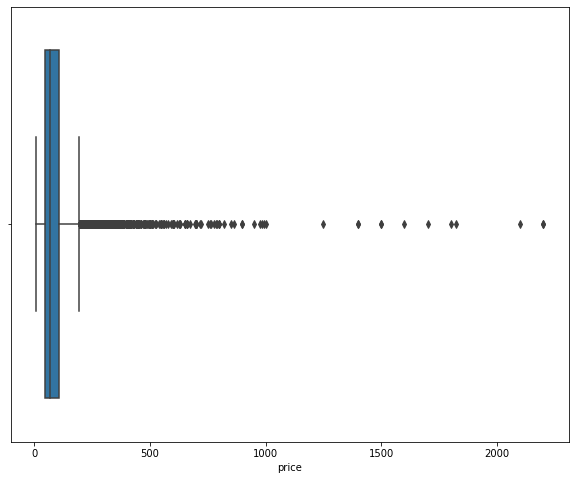

In [221]:
plt.figure(figsize=(10,8))
sns.boxplot(df_v8['price'])

Now let's see if what is the price differene between the house having 2bhk and houses having 3 bhk, and we will use the scatter_plot_bhk function to plot a scatter plot for that.

In [222]:
def scatter_plot_bhk(df,location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    plt.figure(figsize=(10,8))
    sns.scatterplot(bhk2.total_sqft, bhk2.price, color='blue', label='2bhk')
    sns.scatterplot(bhk3.total_sqft, bhk3.price, color='green', label='3bhk')
    plt.xlabel("Total sqft area")
    plt.ylabel("Price per sqft")
    plt.title('location')
    plt.legend()

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


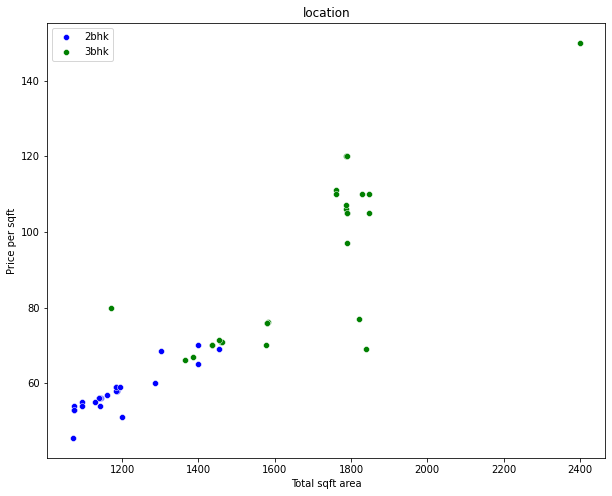

In [223]:
scatter_plot_bhk(df_v8,'Kothanur')

We observe that there are some values where the 3bhk prices are lot less as compared to the 2bhk prices so we have to deal with those ouliers too.
we will use the outlier_remove_bhk function in which we will group the data by location and iterate over each location dataframe, inside that we will again group the location dataframe by bhk column and iterate over that to find out the mean, standard deviationaverage of each bhk dataframe and append it to a dictionary.
Again we will group the location dataframe by bhk and iterate over that - if the count if bhk is greater than 5 then we will remove those rows whose price per sqft is less than the mean price per sqft of bhk-1.

In [224]:
def outlier_remove_bhk(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']> 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [225]:
df_v9 = outlier_remove_bhk(df_v8)
df_v9.shape

(8696, 8)

We will plot visualisation to observe the outliers are removed, few outliers may exist. but if we plot a histogram of price oer sqft then we can see that the data is now more normalised, we can see the bell shape curve forming.

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


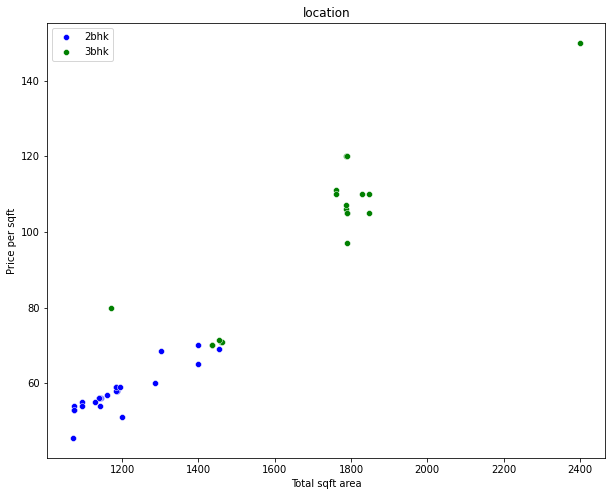

In [226]:
scatter_plot_bhk(df_v9,'Kothanur')

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

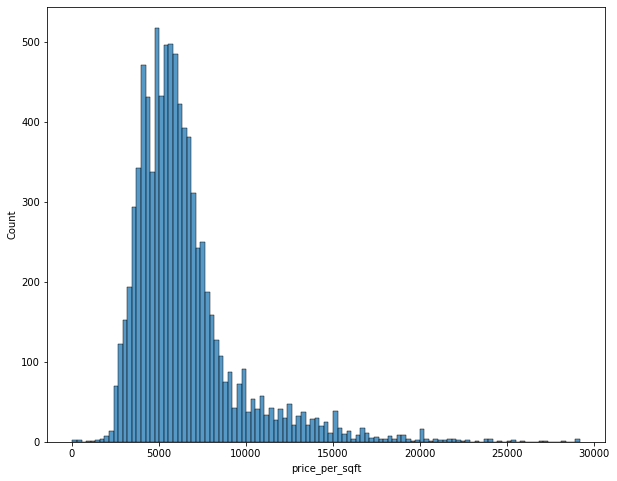

In [227]:
plt.figure(figsize=(10,8))
sns.histplot(df_v9.price_per_sqft)

Let's look at the bath column, some of the houses in the database has far more number of bath as compared to the number of bedrooms so we will have a look at the number of columns which has more than 2 baths as compared to bedroom and will remove those rows.

In [228]:
df_v9['bath'].unique()

array([ 2.,  3.,  4.,  6.,  5.,  1., 12.,  8.,  7., 14.,  9., 10., 16.,
       13.])

Text(0.5, 1.0, 'Number of baths')

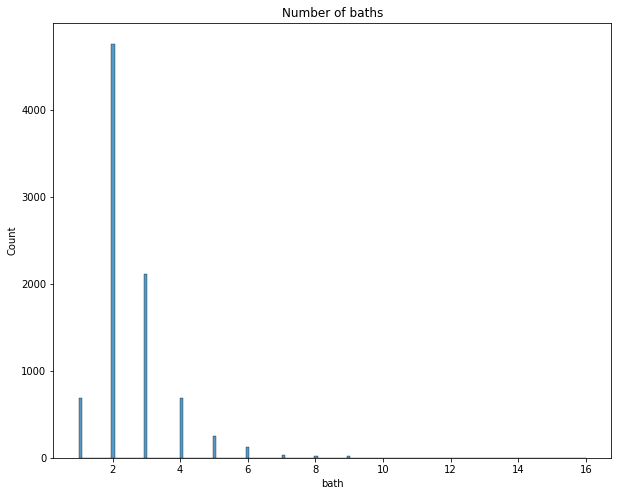

In [229]:
plt.figure(figsize=(10,8))
sns.histplot(df_v9['bath'])
plt.title('Number of baths')

In [230]:
df_v9[df_v9['bath']>df_v9['bhk']+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
90,Plot Area,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961.538462
705,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1789,Plot Area,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1934,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6348,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6952,Super built-up Area,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
8202,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
10065,Super built-up Area,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
11351,Plot Area,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


In [231]:
df_v9 = df_v9[df_v9['bath']<df_v9['bhk']+2]
df_v9.shape

(8599, 8)

Now we will proceed with the feature engineering, and some columns like size, price per sqft and area type we will not use as features so we will drop those columns.

In [232]:
df_v10 = df_v9.drop(['size','price_per_sqft','area_type'], axis='columns')
df_v10.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1170.0,2.0,40.0,2
3,Devarachikkanahalli,1425.0,2.0,65.0,3
4,Devarachikkanahalli,947.0,2.0,43.0,2
5,Devarachikkanahalli,1130.0,2.0,36.0,2


Now or categorical variables, we need to convert them into numerical variables and for that we will use the pandas get_dummies function that will use one hot encoder to encode our categorical features.
After that we will merge the dummy data to the original dataframe and drop the original location column.

In [233]:
df_dummy = pd.get_dummies(df_v10['location'])
df_dummy.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
df_dummy = df_dummy.drop(['other'], axis='columns')
df_dummy.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
df_v11 = pd.concat([df_v10, df_dummy], axis='columns')
df_v11 = df_v11.drop(['location'], axis='columns')
df_v11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1130.0,2.0,36.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will separate our target variable and features and then use train_test_split method to split the dataframe into training data and test data.

In [236]:
X = df_v11.drop(['price'], axis='columns')
y = df_v11.price

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

We will first try to predict our prices using the linear regression model and calculate the cross_val_score to verify the accuracy of our predictions.

In [238]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [239]:
model_lr.score(X_test,y_test)

0.5277830097711151

In [240]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([-46.91317983,   0.42491469,   0.5628025 ,   0.49363604,
         0.46022893])

Since we got very less score for the linear regression model we will try two more models - RandomForestRegressior and GradientBoostingRegressor models to predict our prices.

Now to find the best parameters for the models we will use GridSearchCV which will provide us with the best parameters to train our model.

In [241]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

We will define a function and inside that we will create a dictionary that will store the model name and the parameters, then we will use a for loop to iterate over the items in the dictionary and find out our best parameters using GridSearchCV.

In [242]:

def find_best_model_gridsearchcv(X, y):
    algos = {
        
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[250,300,350],
                'random_state':[1],
                # 'criterian':['squared_error','poisson'],
                'min_samples_split':[2,5,7]

            }
        },
        'gradient_boosting':{
            'model':GradientBoostingRegressor(),
            'params':{
                'n_estimators':[250,300,350],
                'random_state':[1],
                'max_depth':[2,5,7],

            }
        }
    }
    scores= []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'],cv =cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [243]:
best_model = find_best_model_gridsearchcv(X,y)
best_model.head()

,model,best_score,best_params
0,random_forest,0.773129,"{'min_samples_split': 2, 'n_estimators': 350, ..."
1,gradient_boosting,0.827096,"{'max_depth': 7, 'n_estimators': 350, 'random_..."


In [244]:
best_model['best_params']

0    {'min_samples_split': 2, 'n_estimators': 350, ...
1    {'max_depth': 7, 'n_estimators': 350, 'random_...
Name: best_params, dtype: object

In [245]:
model_gb = GradientBoostingRegressor(n_estimators=350, random_state=1, max_depth=7)
model_gb.fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)

In [246]:
from sklearn.metrics import mean_squared_error

rmse_gb = mean_squared_error(y_test, pred_gb,squared=False)
print(f'rmse score: {rmse_gb}')

rmse score: 44.32265607113821


In [247]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cv_score = cross_val_score(model_gb, X, y, cv=cv)
print(f'cross val score: {cv_score}')

cross val score: [0.79984834 0.79091869 0.83558354 0.86801132 0.84112045]


Finally we will create a function in which we will provide the location, area in sqft, baths, and bhk as parameter and the model will help us predict price for that values.

In [248]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] =sqft
    x[1] = bath
    x[2] = bhk

    if loc_index>=0:
        x[loc_index] = 1
    return model_gb.predict([x])[0]

In [249]:
predict_price('Vijayanagar', 1178, 2, 2)

c:\Users\ugosw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


64.51698214222522